## Macroeconomic trend visualization

Following notebook is focused on doing macroeconomic analysis considering data got from the official Eurostat website. 
The main goal is leading the user through a pipeline visualization that lets him easiest and faster interpret the data and potentially custom them to filter it by specific requirements.

### SetUp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read datasets

In [4]:
# read datasets by google drive
def read_gdrive_to_df(file_id):
    """
    Read an Excel file from Google Drive using its file ID and return a DataFrame.
    """
    base_url = f'https://drive.google.com/file/d/{file_id}/view?usp=sharing'
    download_url = 'https://drive.google.com/uc?id=' + base_url.split('/')[-2]
    return pd.read_excel(download_url, index_col=0)

# File IDs
# df_all_replaced_link = '104-UdrHarSqFCWlDxpewvWT0XmiaBMPu'
# df_normalize_link = '1hFZkvm_r3arVSv-VyUzCOStub9KLupHk'
# df_mean_distance_link = '10iqaD8LEWDXpb1qKfHNNvNdVvODkW1Ap'

group1_link = '1SeBohyPghZlnyAA4m0i-jNUpsVF1IH8V'
group2_link = '1CjfgPobiWVD4I8oA8dTVLFjOpDsNbJ2J'
group3_link = '1et8qCxbgSucKb7zYkb698izsPpM2Reoa'
    
# Read files using the function
# df_all_replacede = read_gdrive_to_df(df_all_replaced_link)
# df_normalize = read_gdrive_to_df(df_normalize_link) # normalized data (all changed by previous year difference)
# df_mean_distance = read_gdrive_to_df(df_mean_distance_link) # mean distance from year for each country

# Last save groups of countries
group1 = read_gdrive_to_df(group1_link)
group2 = read_gdrive_to_df(group2_link)
group3 = read_gdrive_to_df(group3_link)

# Datasets explanation
- df_normalize: data normalized (zscore) + made difference from previous data (.diff)
- df_mean_distance: by df_normalized has been calculated for each sigle country the distance by mean for each year over the total years

## Groups which contains countries with similarities
(it is an option to filter and analysis just to specific group of countries)

In [5]:
# Example
group1

,country
0,Austria
1,Belgium
2,Cyprus
3,Denmark
4,Germany
5,Luxembourg
6,Malta
7,Netherlands
8,Sweden
9,Switzerland


In [6]:
# Get from 'df_mean_distance' the countries indices each group and split the dataframe
df = df_normalize.copy()
df.reset_index(drop=True, inplace=True)

df_norm_dist_group1 = df[df['country'].isin(group1['country'])]
df_norm_dist_group2 = df[df['country'].isin(group2['country'])]
df_norm_dist_group3 = df[df['country'].isin(group3['country'])]

In [7]:
# Get from 'df_mean_distance' the countries insides each group and split the dataframe
df = df_mean_distance.copy()
df.reset_index(drop=True, inplace=True)

df_mean_dist_group1 = df[df['country'].isin(group1['country'])]
df_mean_dist_group2 = df[df['country'].isin(group2['country'])]
df_mean_dist_group3 = df[df['country'].isin(group3['country'])]

# <u>Data analysis

**Pipeline:**
- **1st plot:** mean change during years
- **2th plot:** average change for each country over the years
- **3.1th plot:** data distribution during years by geographic
- **3.2th plot:** data distribution during years by country
- **4th plot:** intensity color change by difference values over years
- **5th plot:** intensity color by values mean change over years

# 1st plot: mean change during years
### **Dataset**: df_normalize

In [8]:
def plot_single_bubble_chart(df, last_col='Year', aggregation='sum'): # sum or mean
    columns_to_plot = df.columns[df.columns.get_loc(last_col) + 1:].tolist()

    MAX_BUBBLE_SIZE = 6000  # Custom
    MIN_BUBBLE_SIZE = 200    # Custom

    for column in columns_to_plot:
        plt.figure(figsize=(15, 6))

        years = df[last_col].unique()
        aggregated_values = df.groupby(last_col)[column].agg(aggregation)

        # Calculate the size of normalized bubbles
        max_aggregated_value = aggregated_values.max()
        normalized_sizes = (aggregated_values / max_aggregated_value) * (MAX_BUBBLE_SIZE - MIN_BUBBLE_SIZE) + MIN_BUBBLE_SIZE

        x = years
        y = np.ones_like(years)

        plt.scatter(x, y, s=normalized_sizes, alpha=0.6, edgecolors="w", linewidth=0.5)
        plt.yticks([])

        for i, year in enumerate(years):
            plt.annotate(f"{aggregated_values[year]:.3f}", (x[i], y[i]), ha='center', va='center')

        plt.title(f'{aggregation.capitalize()} of {column} for Each {last_col}')
        plt.xlabel(last_col)

        plt.show()

C:\Users\utente\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


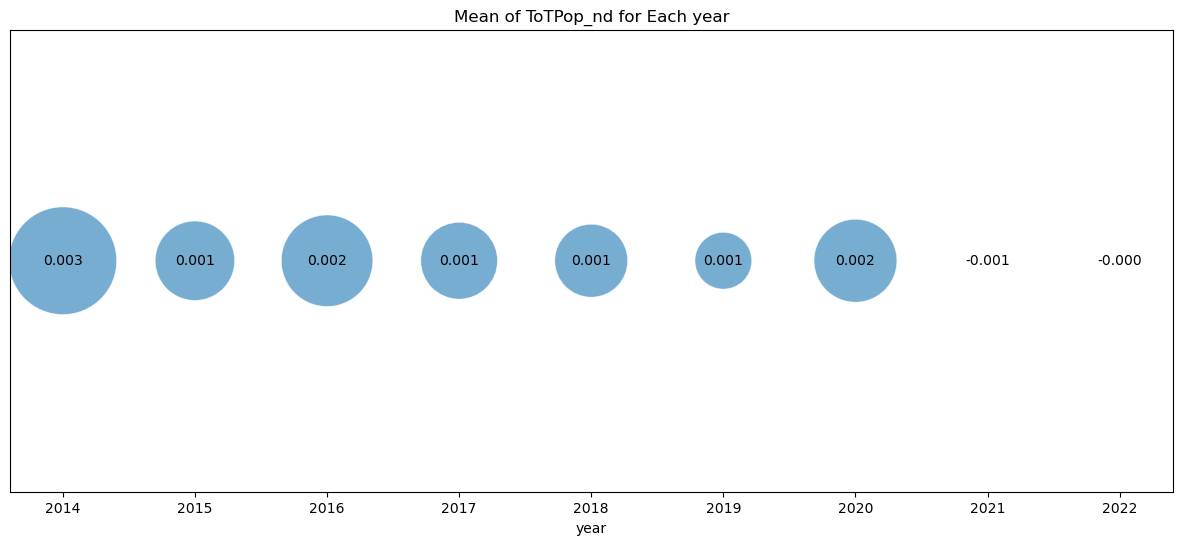

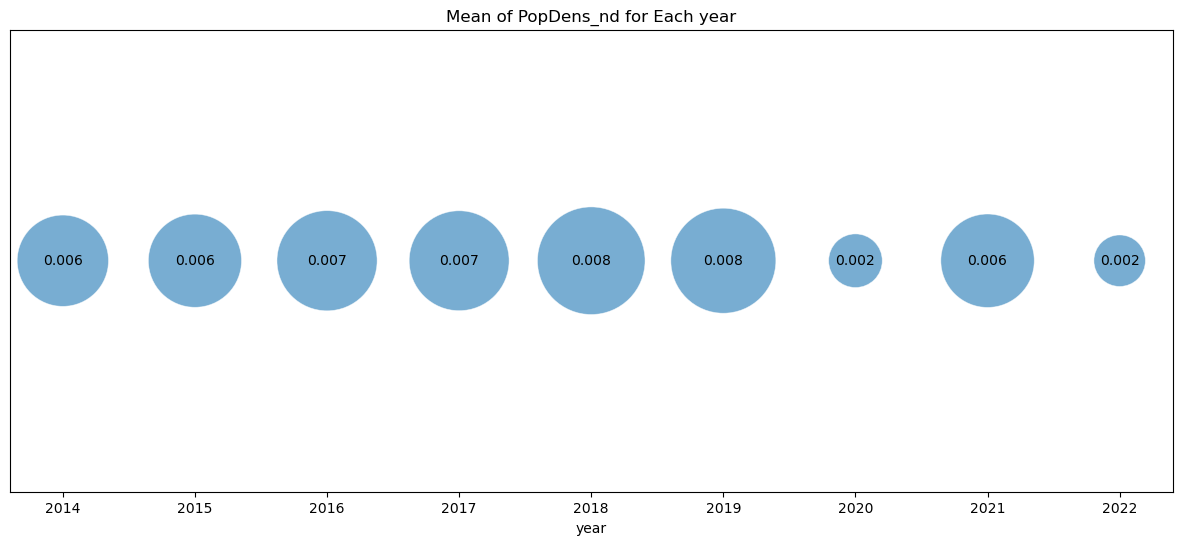

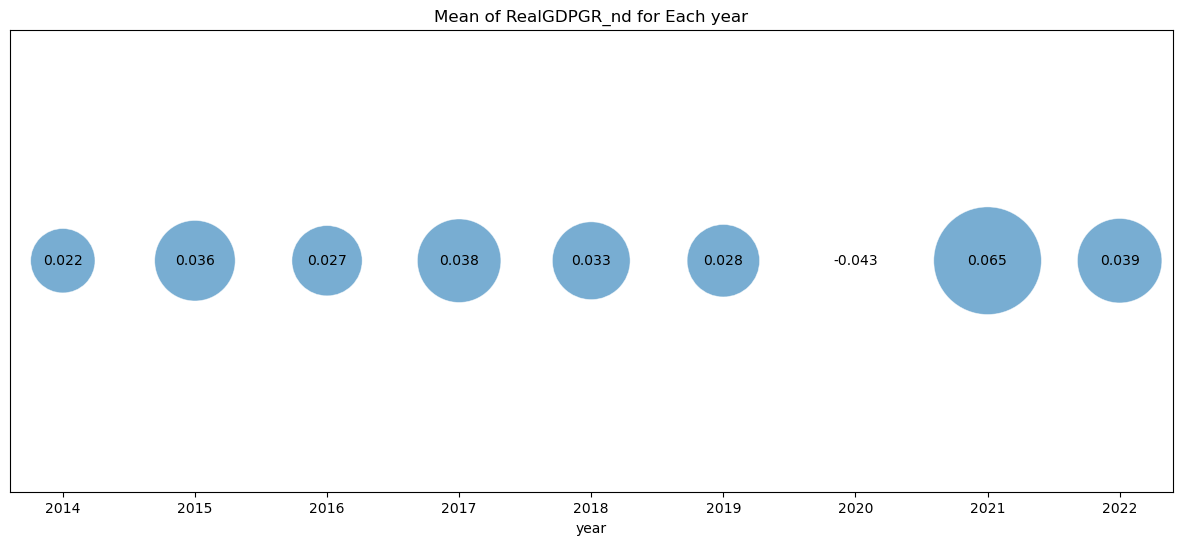

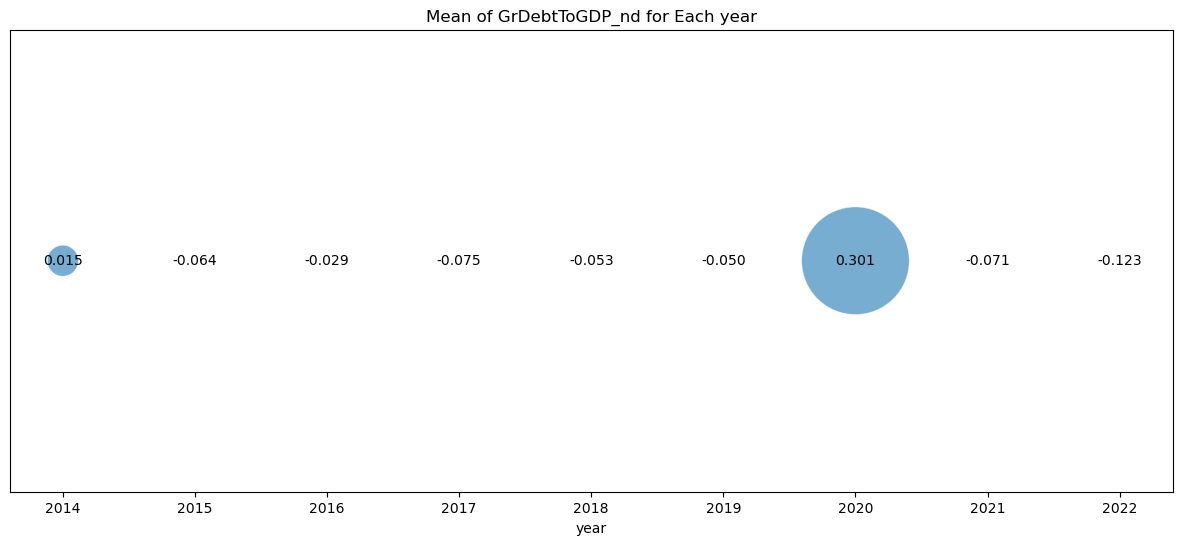

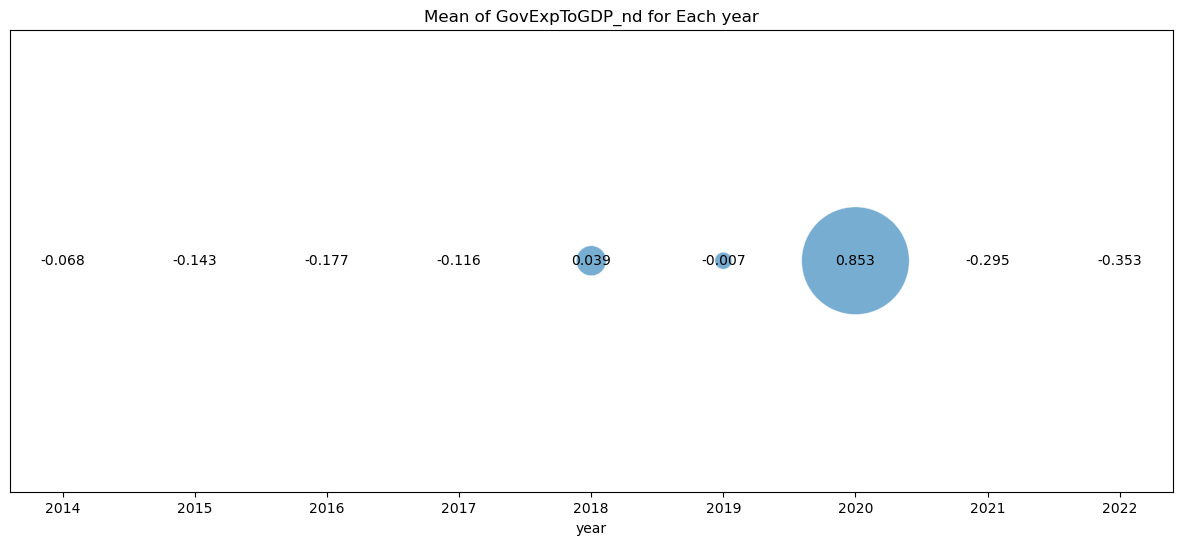

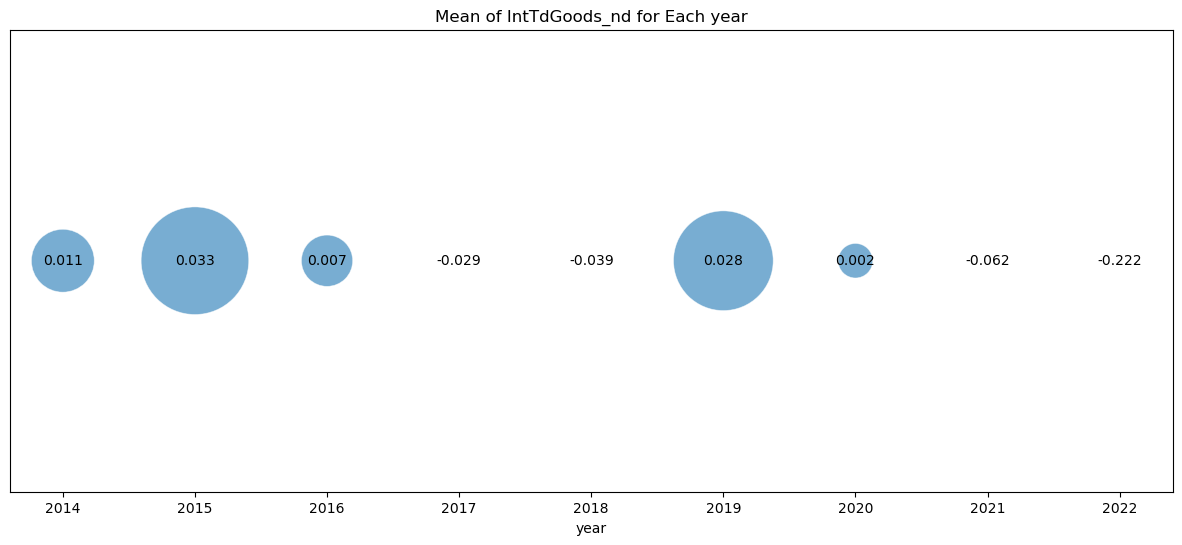

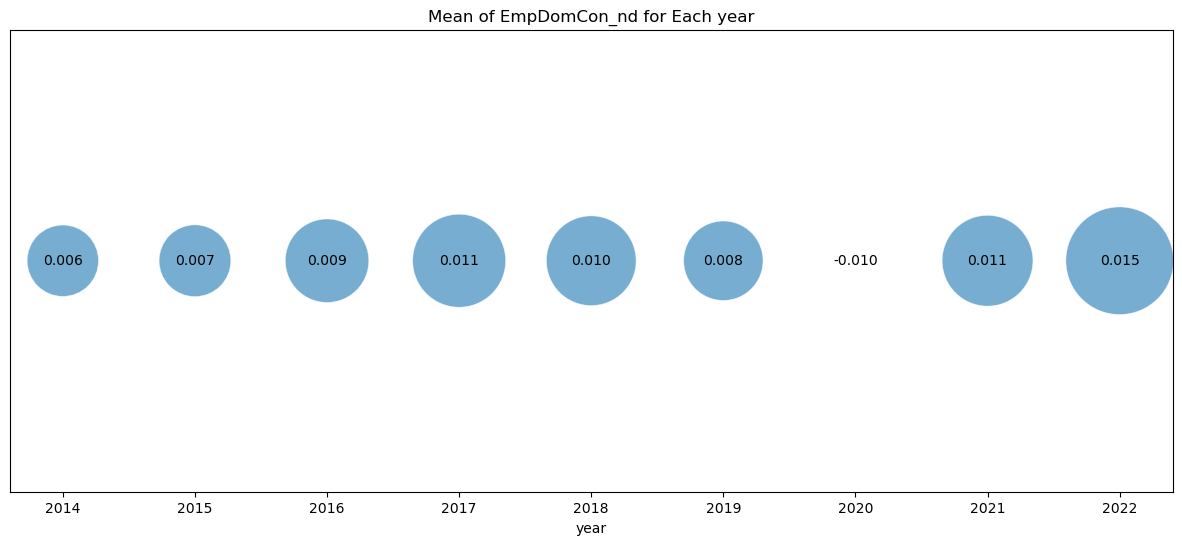

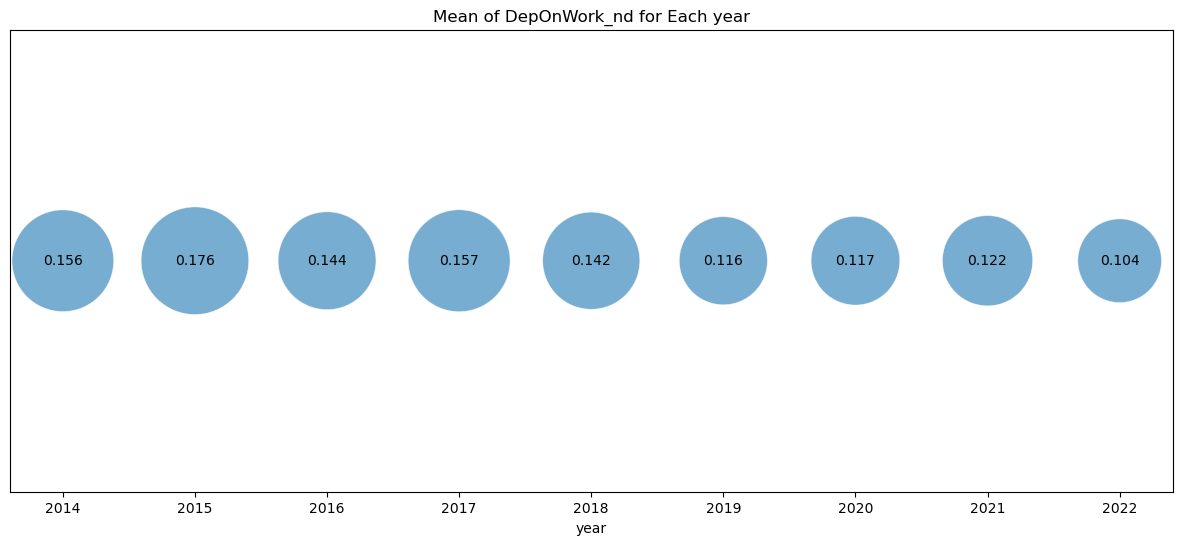

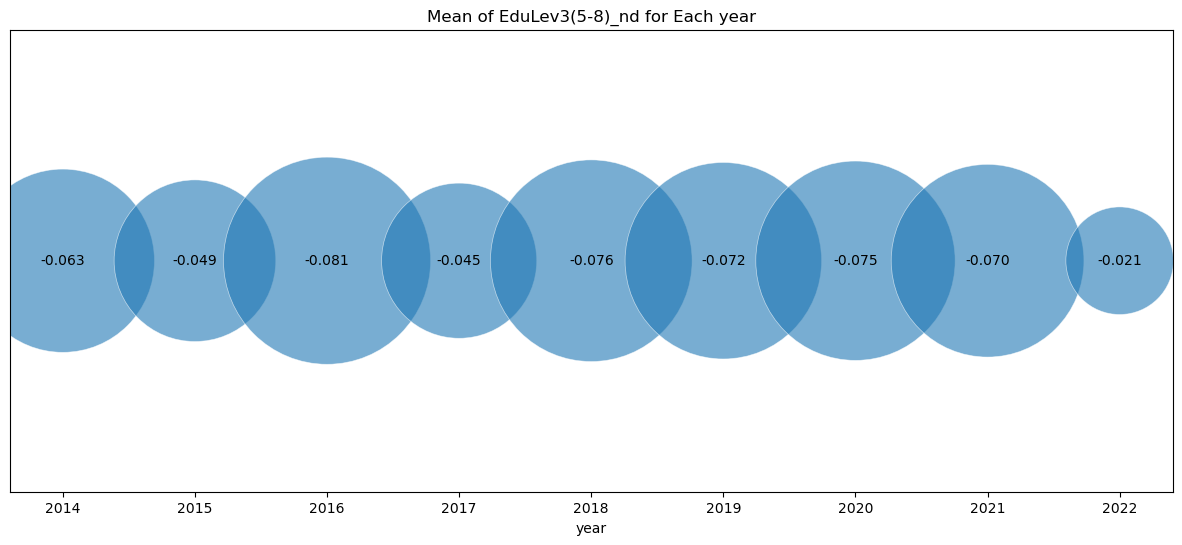

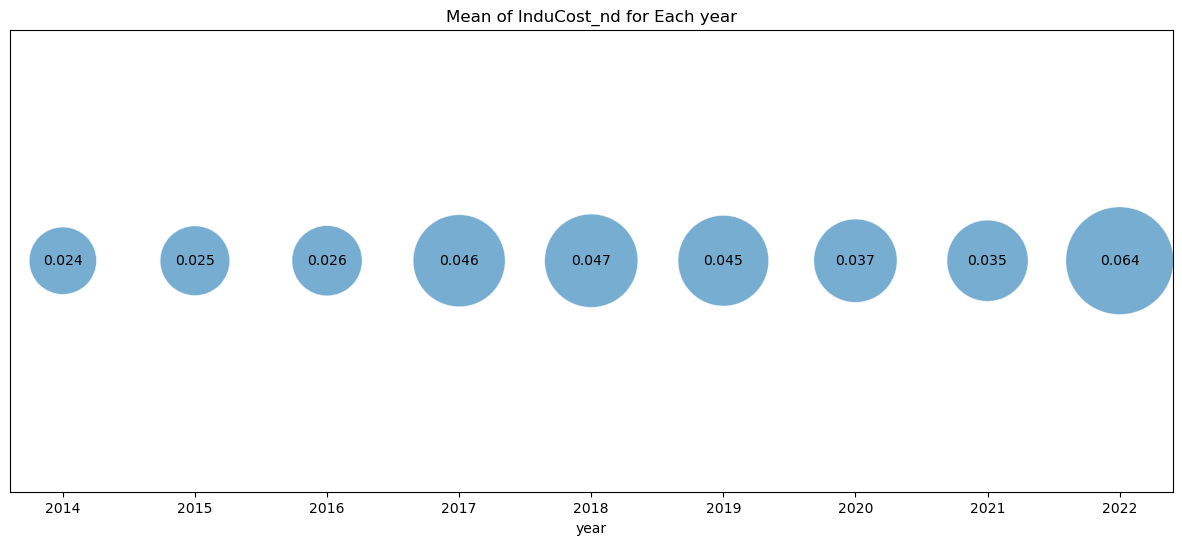

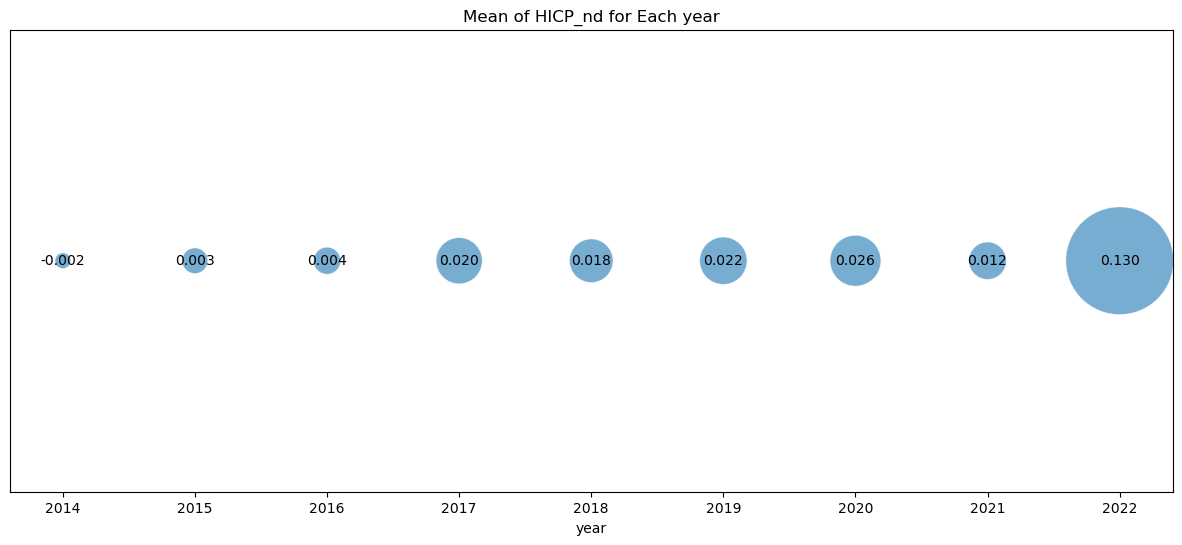

In [11]:
# Bubble Chart (overview about year situation (mean or sum) for each column number)
plot_single_bubble_chart(df_normalize, last_col='year', aggregation='mean')

# 2th plot: average change for each country over the years
### **Dataset**: df_normalize

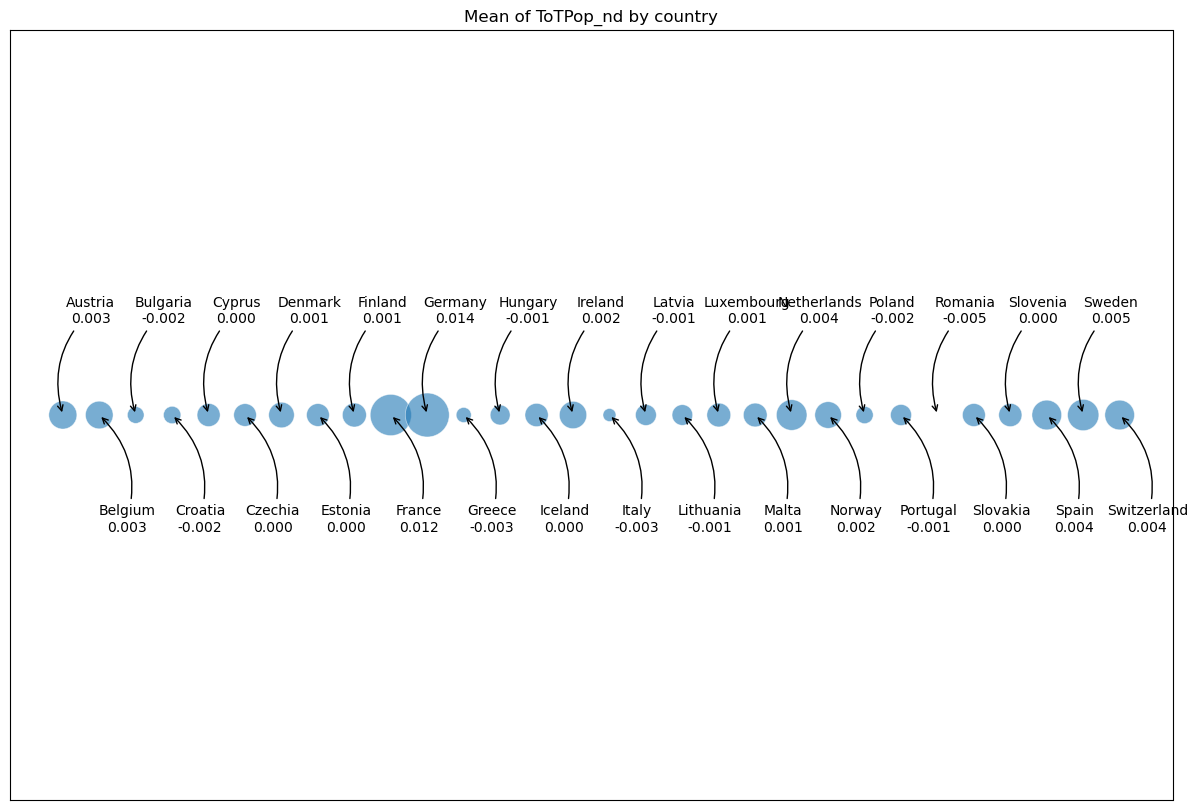

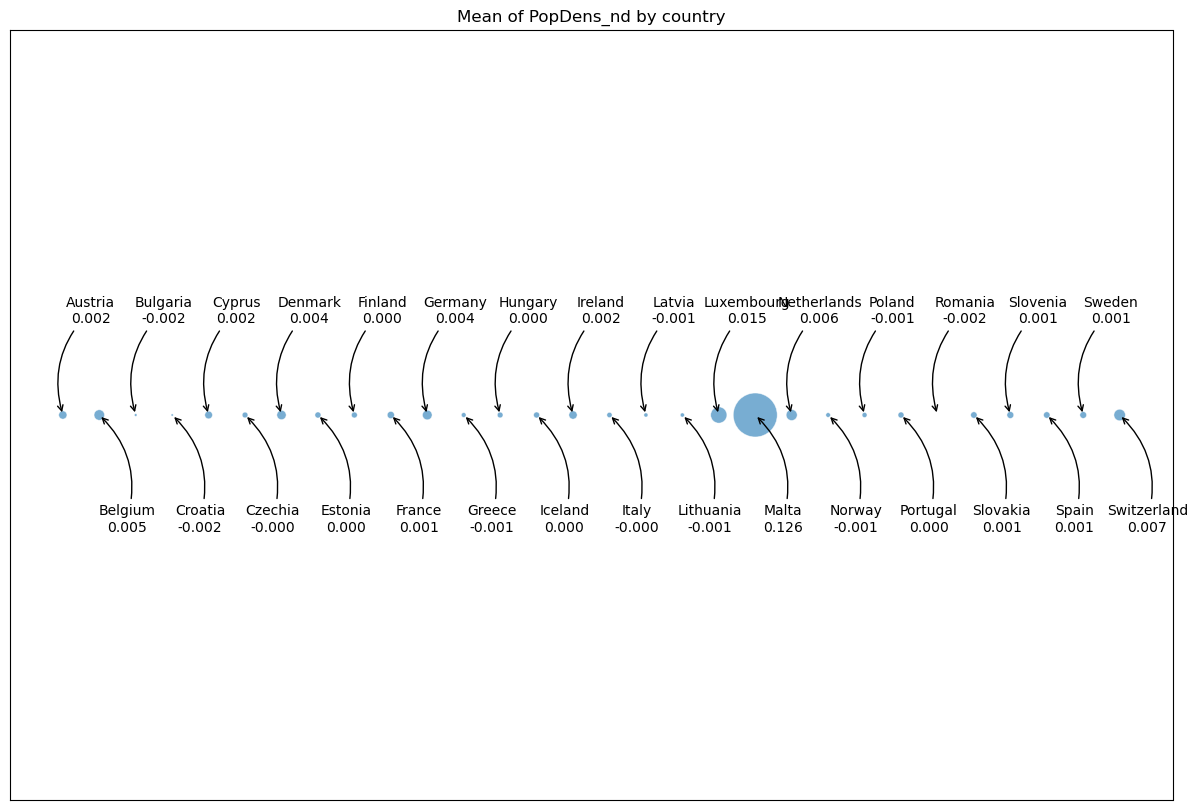

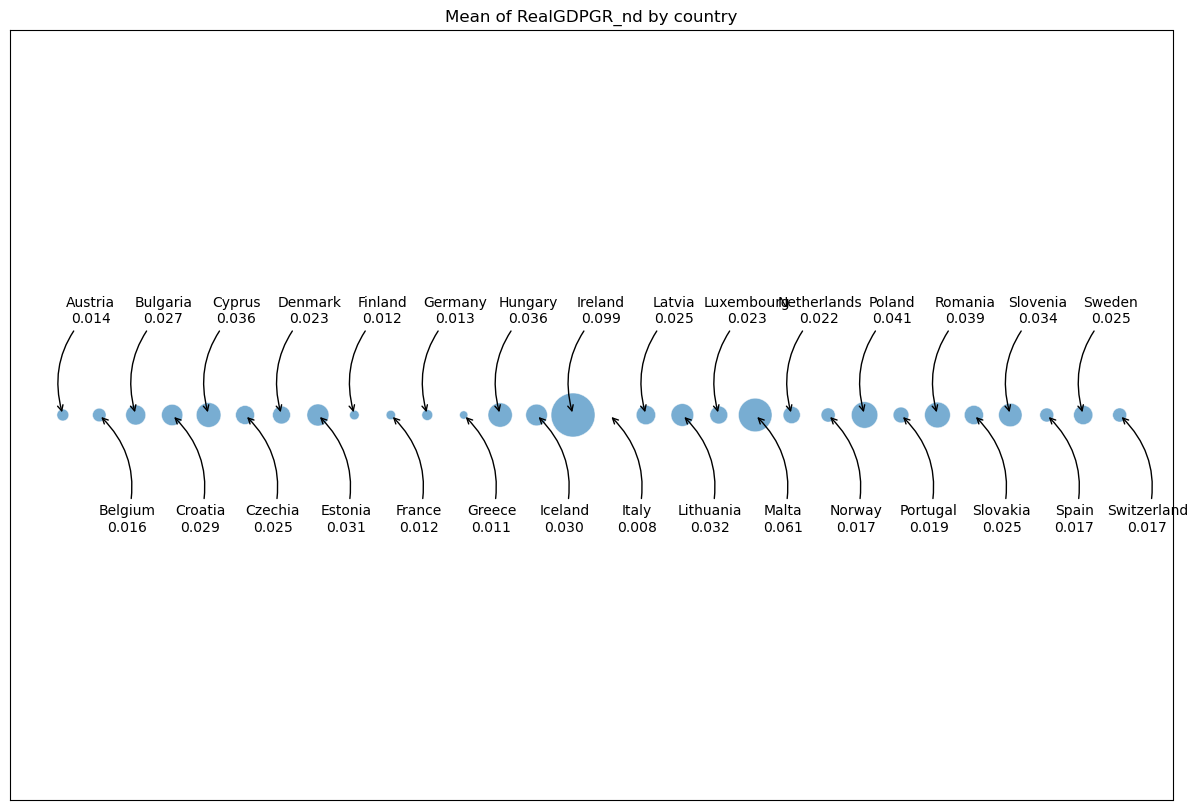

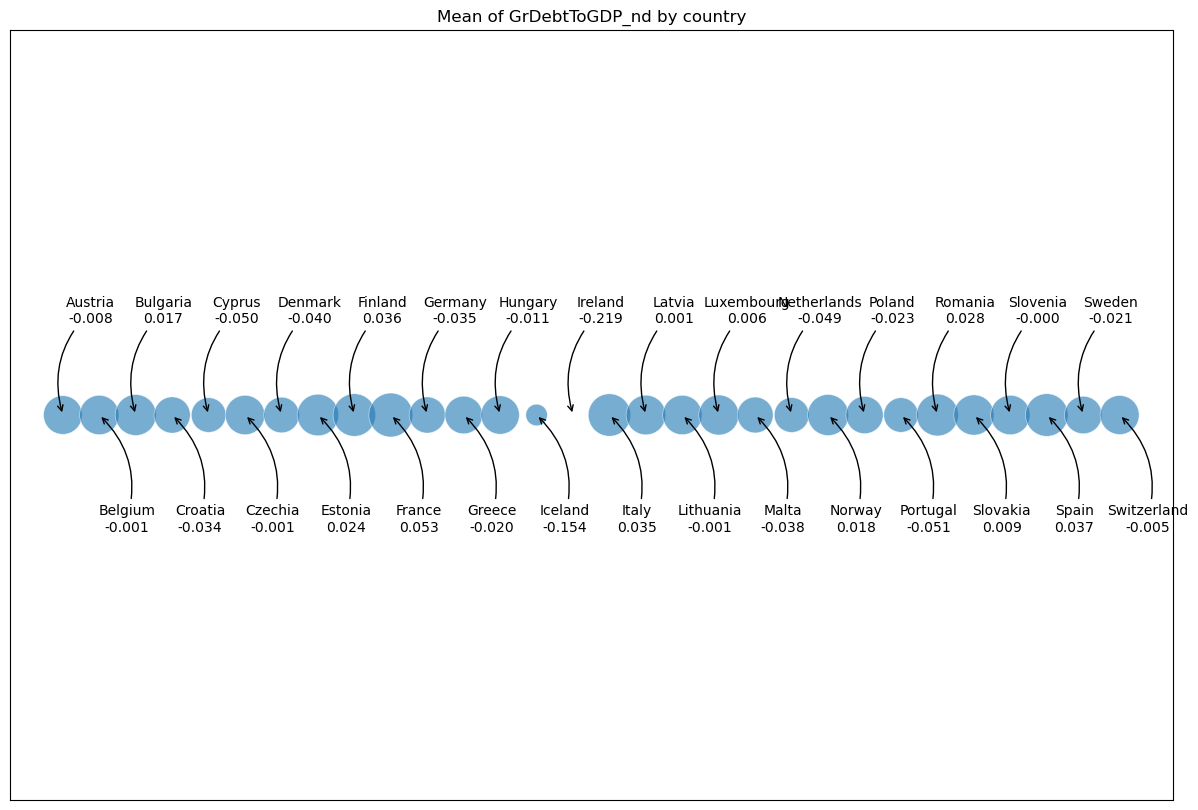

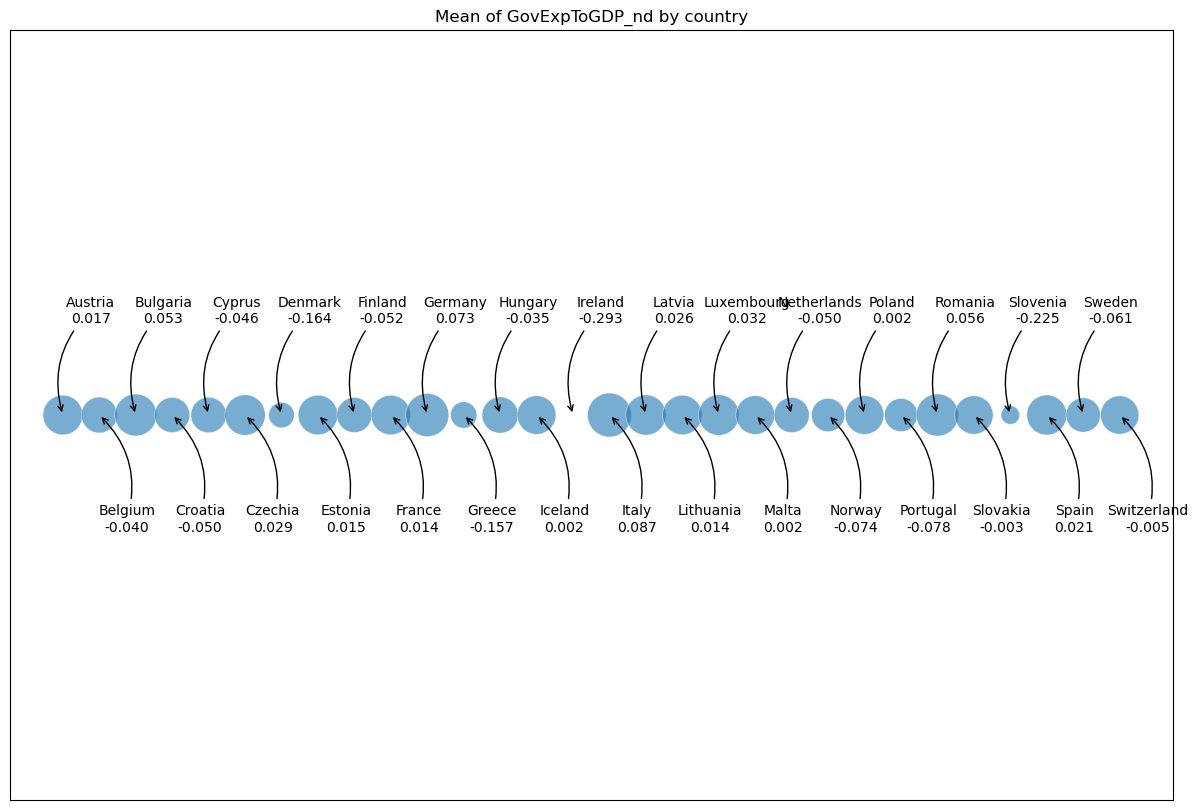

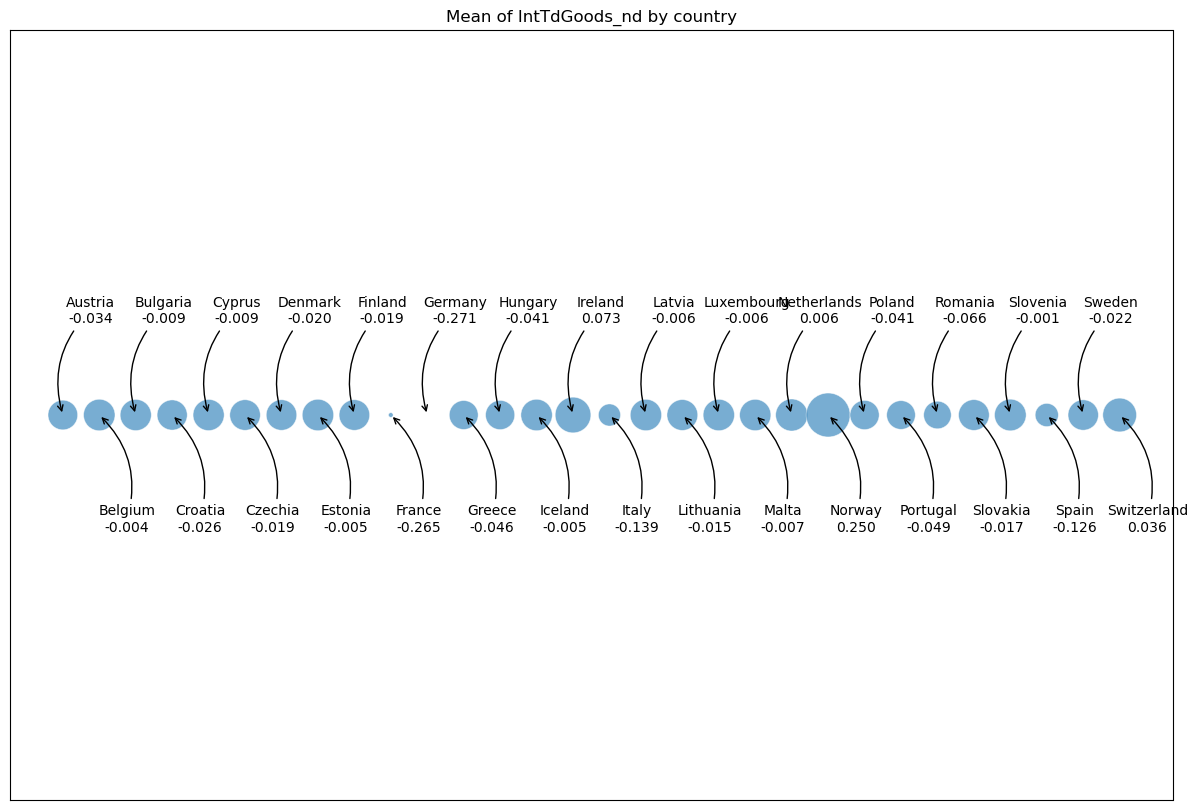

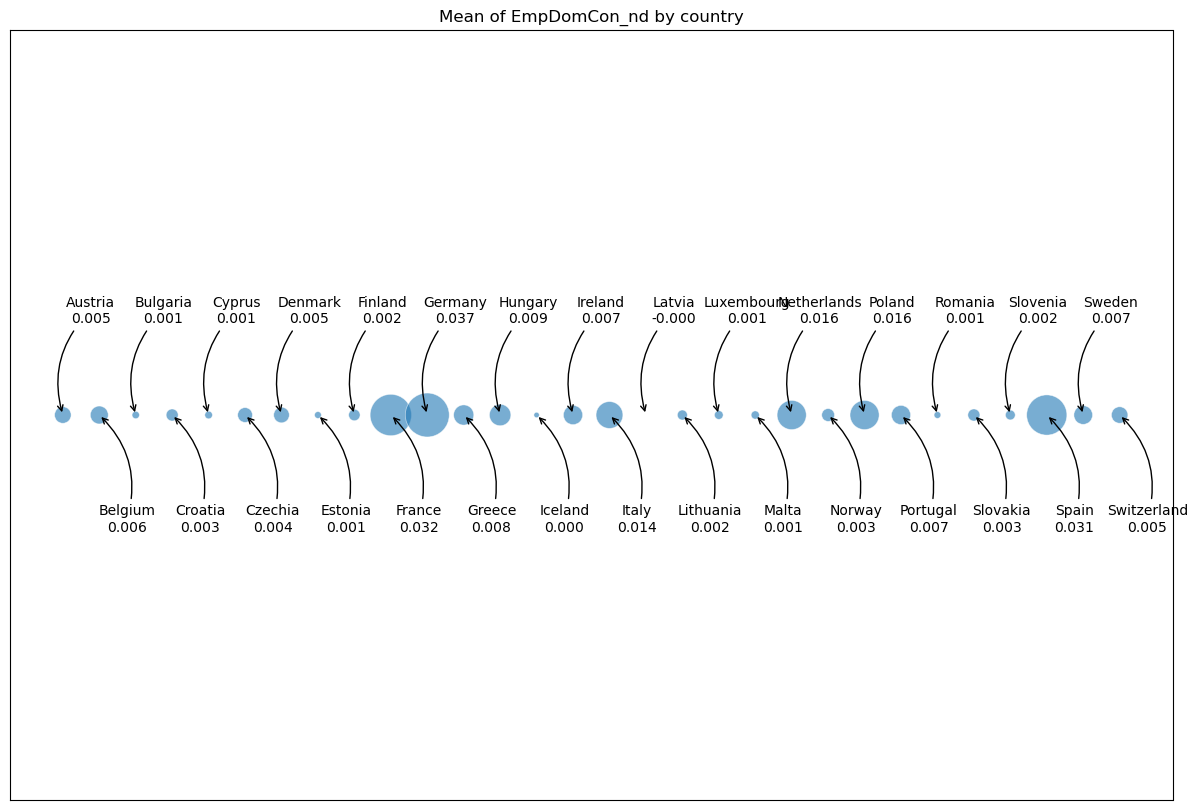

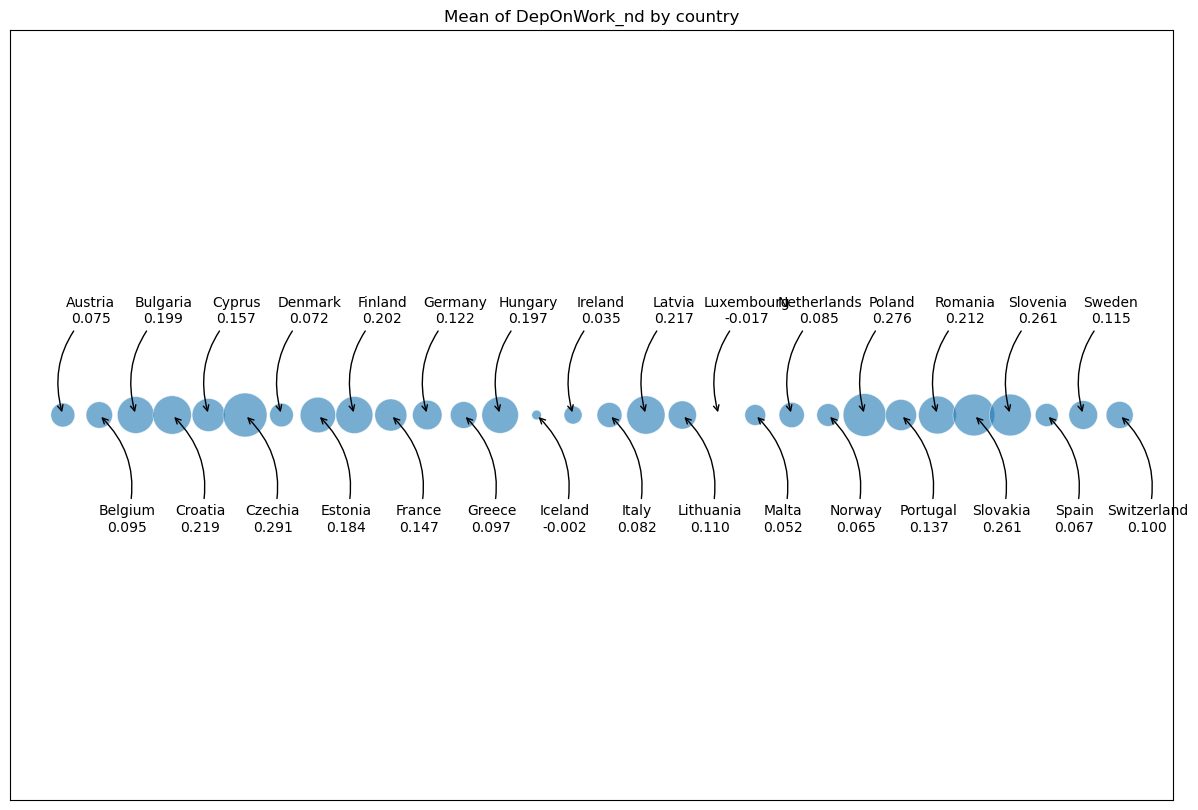

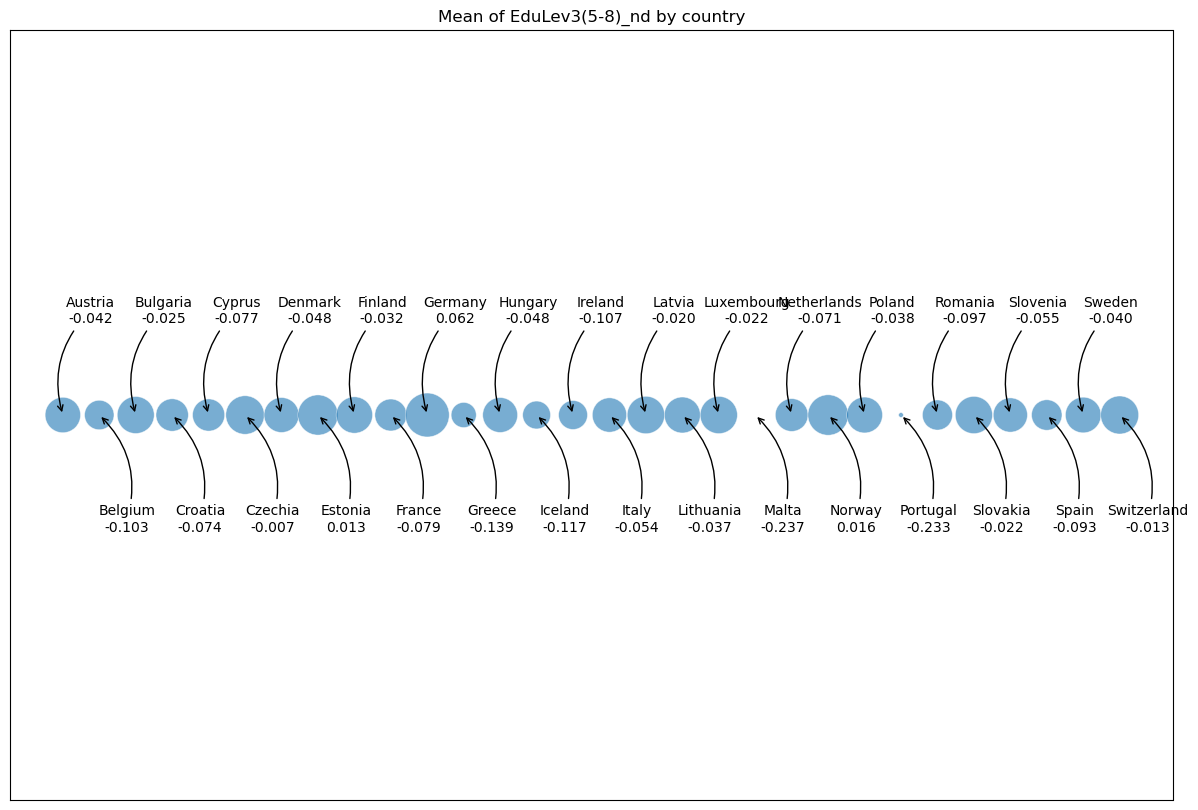

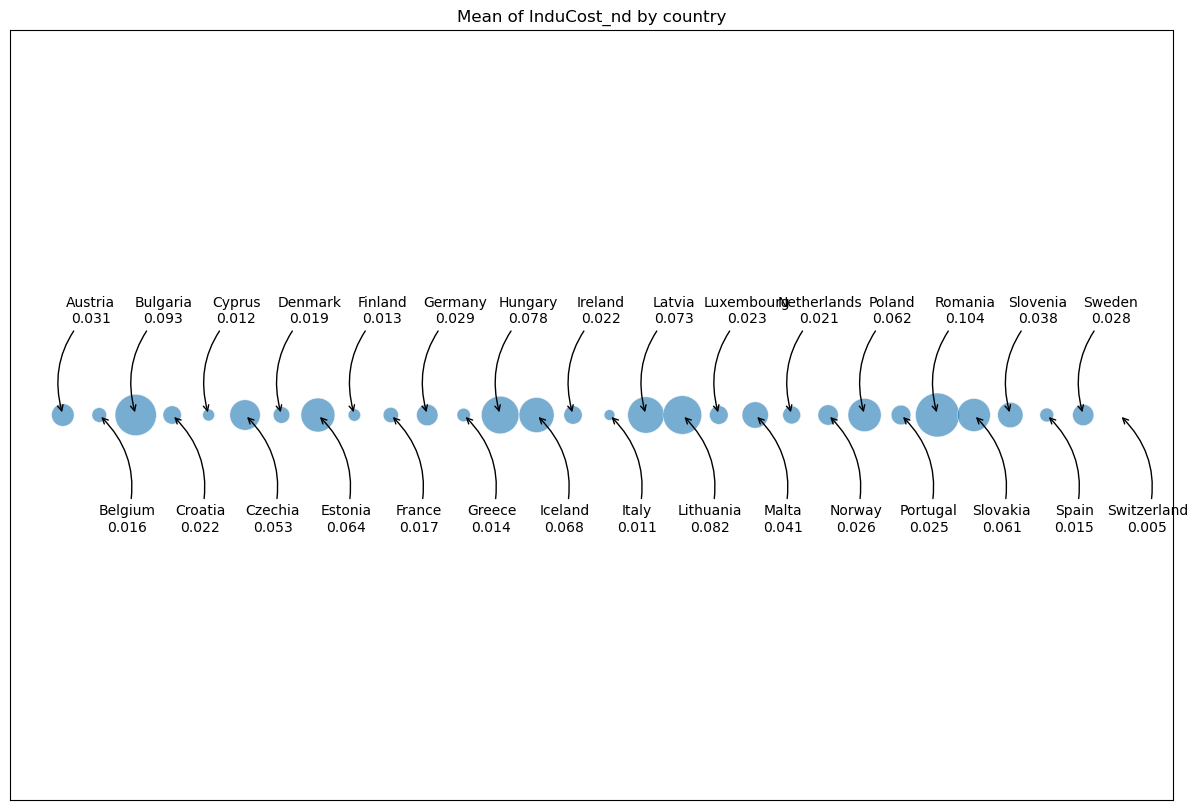

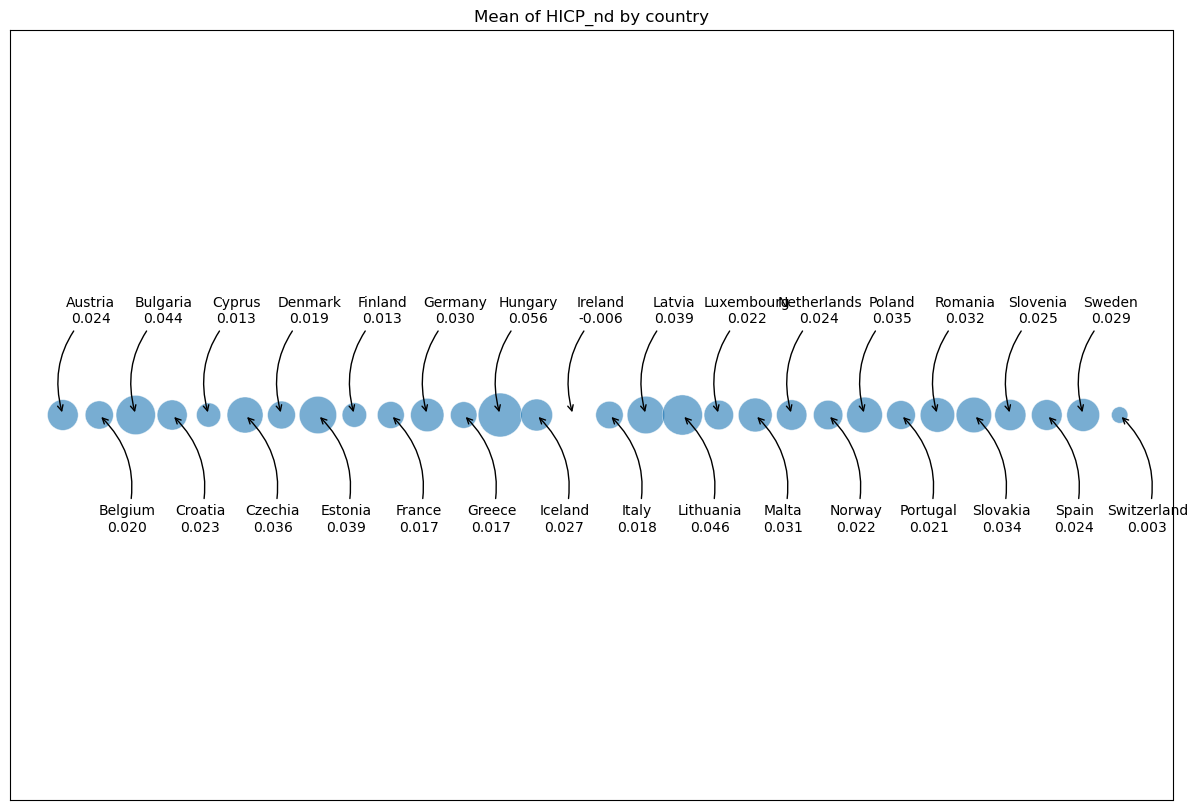

In [19]:
from adjustText import adjust_text

def plot_bubble_chart_with_arrows(df, cat_col, num_col_start, decimal_places=3, use_adjust_text=False):
    columns_to_plot = df.columns[df.columns.get_loc(num_col_start) + 1:].tolist()

    for column in columns_to_plot:
        plt.figure(figsize=(15, 10))

        grouped_data = df.groupby(cat_col)[column].mean().fillna(0)

        spacing_factor = 2.5
        x = [i * spacing_factor for i in range(len(grouped_data))]
        
        y = [1] * len(grouped_data)

        # Scale values
        min_val = grouped_data.min()
        max_val = grouped_data.max()
        sizes = ((grouped_data - min_val) / (max_val - min_val)) * 1000
        bubbles = plt.scatter(x, y, s=sizes, alpha=0.6, edgecolors="w", linewidth=0.5)

        plt.yticks([])  
        plt.xticks([])

        if use_adjust_text:
            texts = []
            for i, (index, value) in enumerate(grouped_data.items()):
                bubble_coords = bubbles.get_offsets()[i]
                texts.append(plt.text(bubble_coords[0], bubble_coords[1], f"{index}\n{value:.{decimal_places}f}", ha='center', va='center'))
            
            adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red'))
        else:
            for i, (index, value) in enumerate(grouped_data.items()):
                bubble_coords = bubbles.get_offsets()[i]
                if i % 2 == 0:
                    vert_offset = 75
                else:
                    vert_offset = -75
                plt.annotate(f"{index}\n{value:.{decimal_places}f}",
                             bubble_coords,
                             xytext=(20, vert_offset), textcoords='offset points',
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"),
                             ha='center', va='center')
        
        plt.title(f'Mean of {column} by {cat_col}')
        plt.show()

# Bubble Chart (overview about country situation (mean or sum) for each column number)
plot_bubble_chart_with_arrows(df_normalize, 'country', 'year', decimal_places=3, use_adjust_text=False)

# 3.1th plot: data distribution during years by geographic
### **Dataset**: df_mean_distance

In [13]:
def data_distribution(df):
    # Categorical columns available to selection
    available_columns = ['geo', 'country']

    # User selection by 'category'
    col_name = input(f"Select a column from {available_columns}: ")
    while col_name not in available_columns:
        print("Invalid choice. Please select a valid column.")
        col_name = input(f"Select a column from {available_columns}: ")

    # User selection by 'value' of category
    unique_values = df[col_name].unique()
    col_value = input(f"\nSelect a value from {unique_values}: ")
    while col_value not in unique_values:
        print("Invalid choice. Please select a valid value.")
        col_value = input(f"Select a value from {unique_values}: ")

    # Ask user for columns to exclude from plotting
    numeric_columns = df.select_dtypes(include=[float, int]).columns.tolist()
    print(f"\nAvailable numeric columns for plotting: {numeric_columns}")
    columns_to_exclude = input("Enter column names to exclude from plotting, separated by commas: ").split(',')
    columns_to_exclude = [col.strip() for col in columns_to_exclude if col.strip() in numeric_columns]

    # Filter df by user choice
    df_filtered = df[df[col_name] == col_value]

    # Remove unwanted columns
    columns_to_drop = [col for col in df.columns if df[col].dtype == 'object' and col != 'year' and col != col_name]
    df_filtered = df_filtered.drop(columns=columns_to_drop)

    print('\nFollowing: Data & Graphical data distribution\n')
    display(df_filtered)

    # Filter by numeric columns but exclude user specified columns
    numeric_cols = [col for col in df_filtered.select_dtypes(include=[float, int]).columns if col not in columns_to_exclude]

    # Create subplots
    num_cols = 2
    num_rows = int(np.ceil(len(numeric_cols) / num_cols))
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.ravel()

    if col_name == 'geo':
        # By 'geo', show scatterplot
        for i, column in enumerate(numeric_cols):
            axs[i].scatter(df_filtered['year'], df_filtered[column], label='Valori')
            axs[i].axhline(df_filtered[column].mean(), color='red', linestyle='--', lw=1, label='Mean')
            axs[i].set_xlabel('year')
            axs[i].set_ylabel(column)
            axs[i].set_title(f'"{column}" distribution for: {col_name} "{col_value}"')
            axs[i].grid(True)
            axs[i].legend()

    else:
        #Deviation from mean
        df_deviation_from_mean = df_filtered[numeric_cols].transform(lambda x: x - x.mean())
        df_deviation_from_mean['year'] = df_filtered['year']

        for i, column in enumerate(numeric_cols):
            axs[i].plot(df_deviation_from_mean['year'], df_deviation_from_mean[column])
            axs[i].axhline(0, color='black', linestyle='--', lw=1)
            axs[i].set_xlabel('Year')
            axs[i].set_ylabel(f'Deviation from mean "{column}"')
            axs[i].set_title(f'Values deviation of "{column}" and mean for {col_name} "{col_value}"')
            axs[i].grid(True)

    # Hide extra axes
    for j in range(i+1, num_rows*num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

    return df_filtered

Select a column from ['geo', 'country']: geo

Select a value from ['Western Europe' 'Eastern Europe' 'Southern Europe' 'Western Asia'
 'Northern Europe']: Western Europe

Available numeric columns for plotting: ['year', 'ToTPop_md', 'PopDens_md', 'RealGDPGR_md', 'GrDebtToGDP_md', 'GovExpToGDP_md', 'IntTdGoods_md', 'EmpDomCon_md', 'DepOnWork_md', 'EduLev3(5-8)_md', 'InduCost_md', 'HICP_md']
Enter column names to exclude from plotting, separated by commas: year

Following: Data & Graphical data distribution



,geo,year,ToTPop_md,PopDens_md,RealGDPGR_md,GrDebtToGDP_md,GovExpToGDP_md,IntTdGoods_md,EmpDomCon_md,DepOnWork_md,EduLev3(5-8)_md,InduCost_md,HICP_md
0,Western Europe,2014,-0.0001,0.0007,-0.0073,0.0792,0.0927,0.1022,-0.0010,-0.0075,-0.1591,-0.0022,-0.0063
1,Western Europe,2015,0.0009,0.0021,-0.0043,0.0320,-0.1945,0.0312,-0.0025,-0.0075,-0.0318,-0.0022,-0.0163
2,Western Europe,2016,0.0027,0.0018,0.0057,-0.0466,-0.1535,-0.0115,0.0006,-0.0523,0.0424,-0.0222,-0.0173
3,Western Europe,2017,0.0007,0.0007,0.0087,-0.1043,-0.1261,-0.0023,0.0022,-0.0075,0.0106,0.0028,-0.0013
4,Western Europe,2018,-0.0004,-0.0012,0.0097,-0.1069,-0.0851,0.0177,0.0025,0.0149,0.0000,0.0048,-0.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Western Europe,2018,-0.0006,-0.0007,0.0120,-0.0469,-0.1049,-0.0394,0.0002,0.0349,-0.0507,-0.0007,0.0111
266,Western Europe,2019,-0.0008,-0.0011,-0.0060,0.0010,0.0456,0.0956,-0.0013,0.0124,-0.0613,0.0029,-0.0009
267,Western Europe,2020,-0.0008,-0.0066,-0.0410,0.1017,0.6884,-0.2134,-0.0076,0.0124,-0.0189,0.0010,-0.0029
268,Western Europe,2021,-0.0006,-0.0007,0.0250,-0.0406,-0.2553,0.4469,-0.0021,-0.0100,0.1402,-0.0085,-0.0219


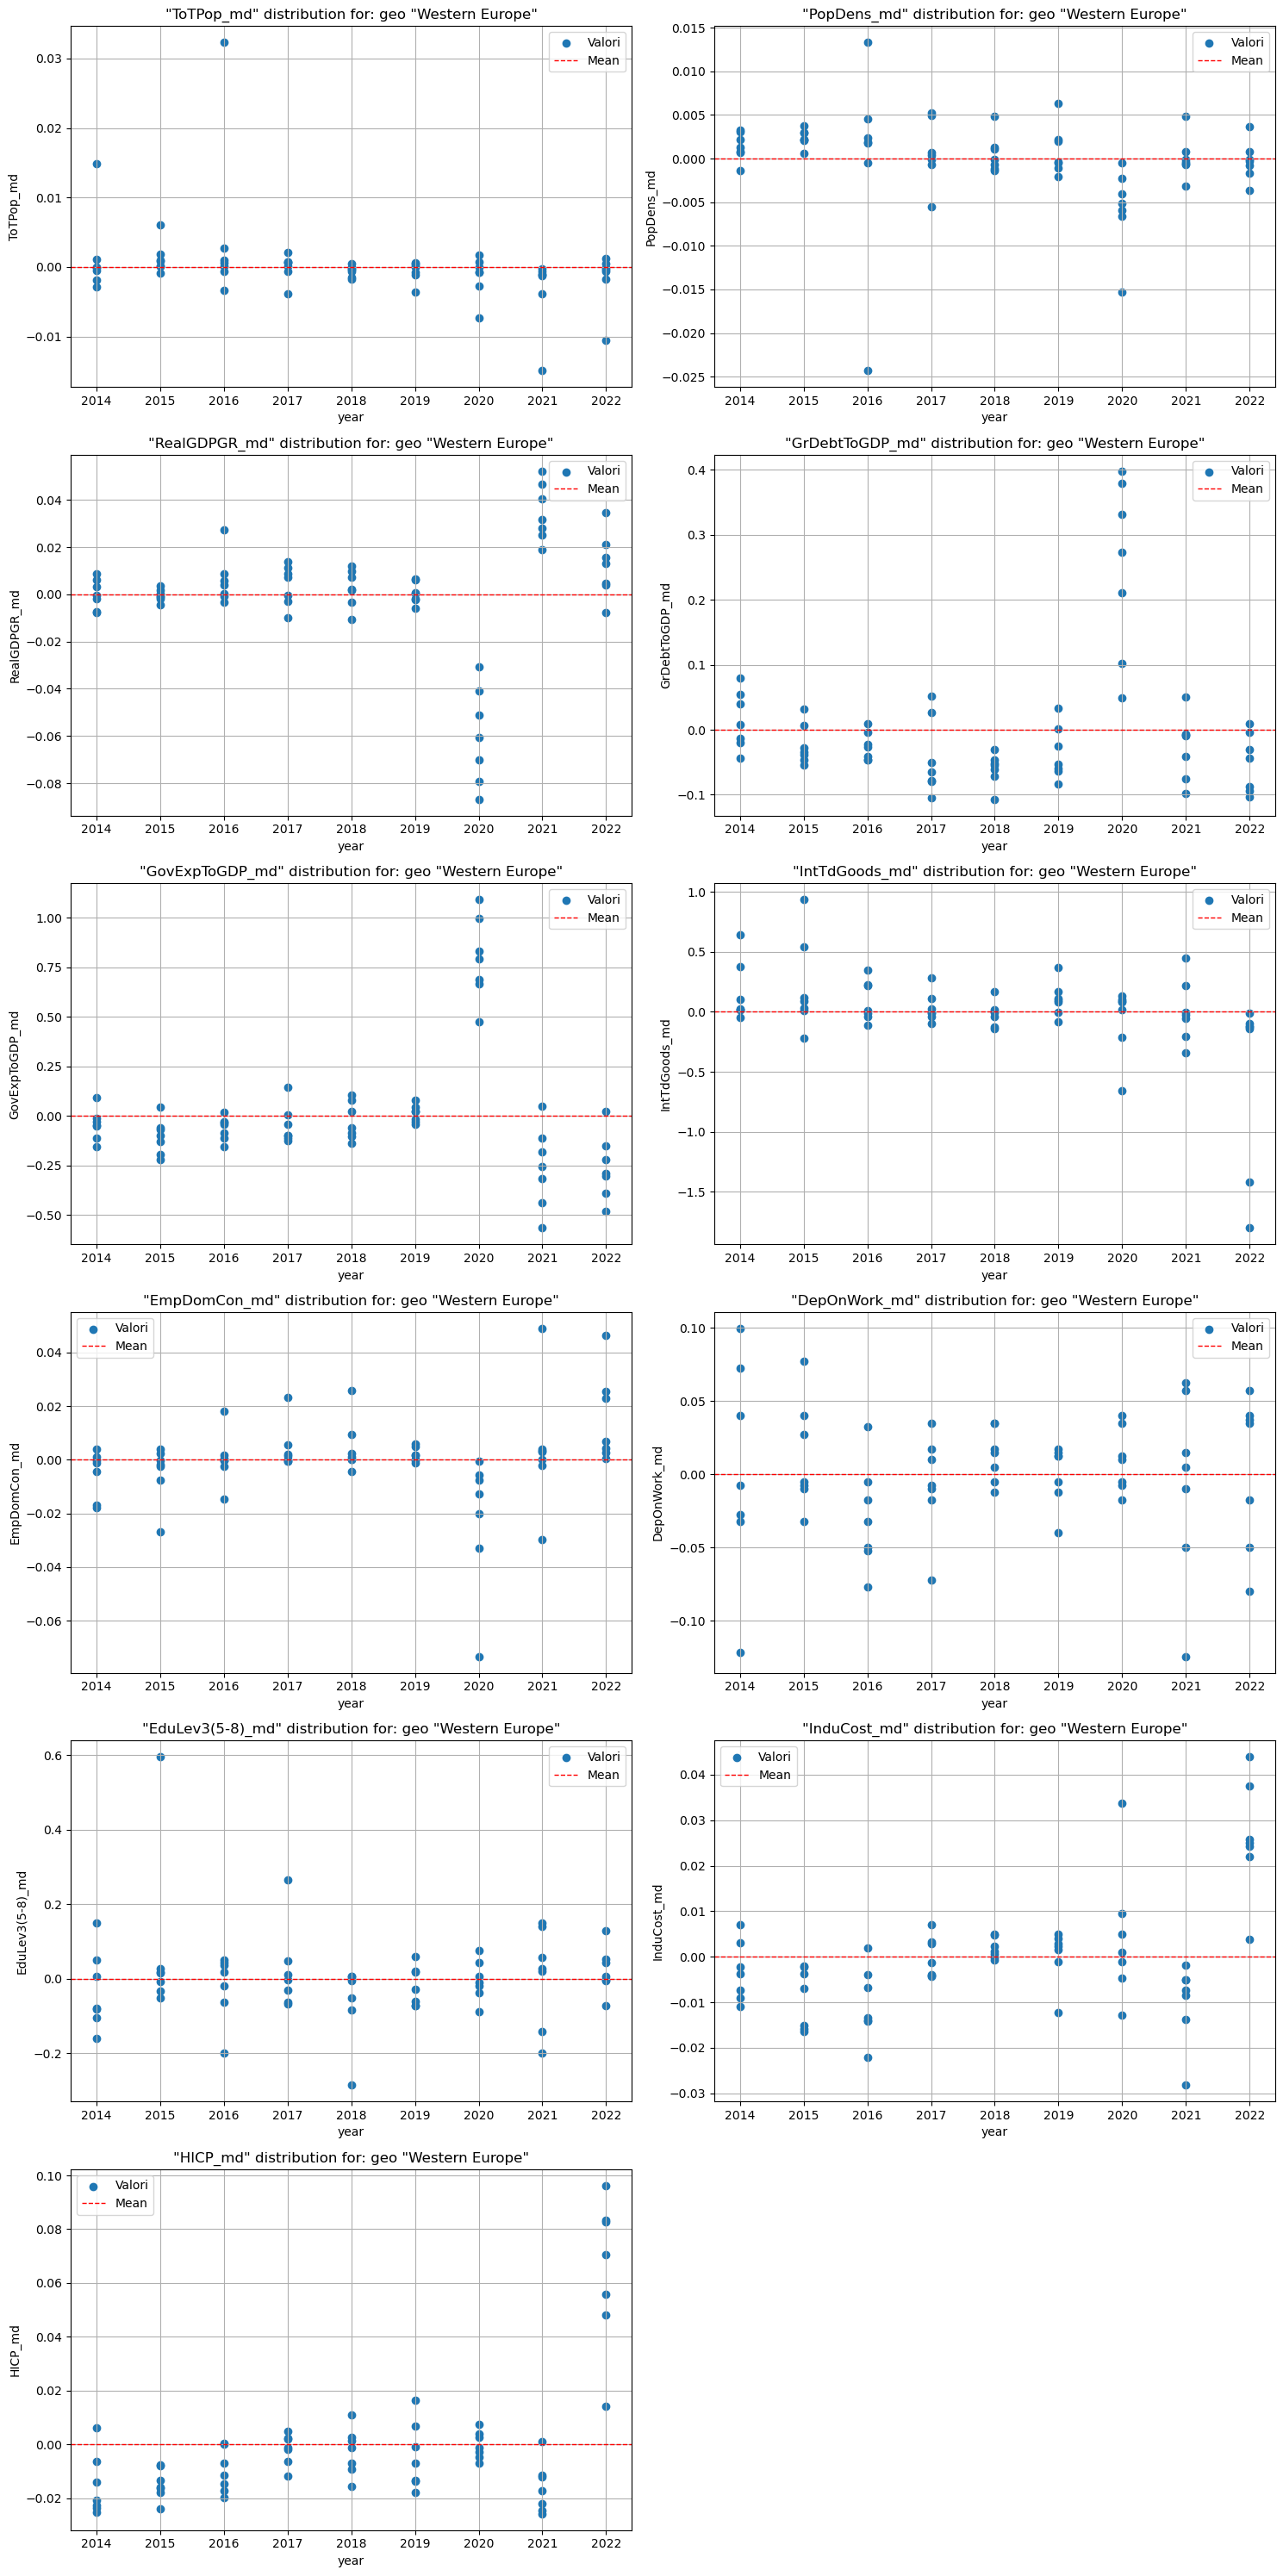

In [14]:
# Check by 'geo'
df_check_geo_distr = data_distribution(df_mean_distance)

# 3.2th plot: data distribution during years by country
### **Dataset**: df_normalize

Select a column from ['geo', 'country']: country

Select a value from ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland']: Italy

Available numeric columns for plotting: ['year', 'ToTPop_nd', 'PopDens_nd', 'RealGDPGR_nd', 'GrDebtToGDP_nd', 'GovExpToGDP_nd', 'IntTdGoods_nd', 'EmpDomCon_nd', 'DepOnWork_nd', 'EduLev3(5-8)_nd', 'InduCost_nd', 'HICP_nd']
Enter column names to exclude from plotting, separated by commas: year

Following: Data & Graphical data distribution



,country,year,ToTPop_nd,PopDens_nd,RealGDPGR_nd,GrDebtToGDP_nd,GovExpToGDP_nd,IntTdGoods_nd,EmpDomCon_nd,DepOnWork_nd,EduLev3(5-8)_nd,InduCost_nd,HICP_nd
151,Italy,2014,0.052373,0.024290,0.000,0.076037,-0.013677,0.265063,0.001880,0.089629,-0.116661,0.003,-0.001
152,Italy,2015,0.000618,-0.000736,0.008,-0.002622,-0.082064,-0.002602,0.016149,0.112036,-0.042422,-0.001,0.011
153,Italy,2016,-0.006207,-0.001472,0.013,-0.013110,-0.164127,0.163535,0.033791,0.089629,-0.031817,-0.004,0.002
154,Italy,2017,-0.003632,-0.007729,0.017,-0.015732,-0.041032,-0.041765,0.029431,0.067222,-0.074239,0.008,0.020
155,Italy,2018,-0.005033,-0.001472,0.009,0.005244,-0.054709,-0.174510,0.023679,0.044814,-0.063633,0.020,0.012
156,Italy,2019,-0.031846,-0.005152,0.005,-0.007866,0.013677,0.351358,0.013476,0.089629,-0.053028,0.015,0.007
157,Italy,2020,-0.008360,-0.003312,-0.090,0.545371,1.162569,0.149707,-0.055672,0.067222,-0.084844,0.038,0.015
158,Italy,2021,-0.019341,-0.003680,0.070,-0.131099,0.041032,-0.479068,0.015386,0.134443,0.021211,-0.007,0.005
159,Italy,2022,-0.009835,-0.003680,0.037,-0.144209,-0.082064,-1.482800,0.044127,0.044814,-0.042422,0.026,0.093


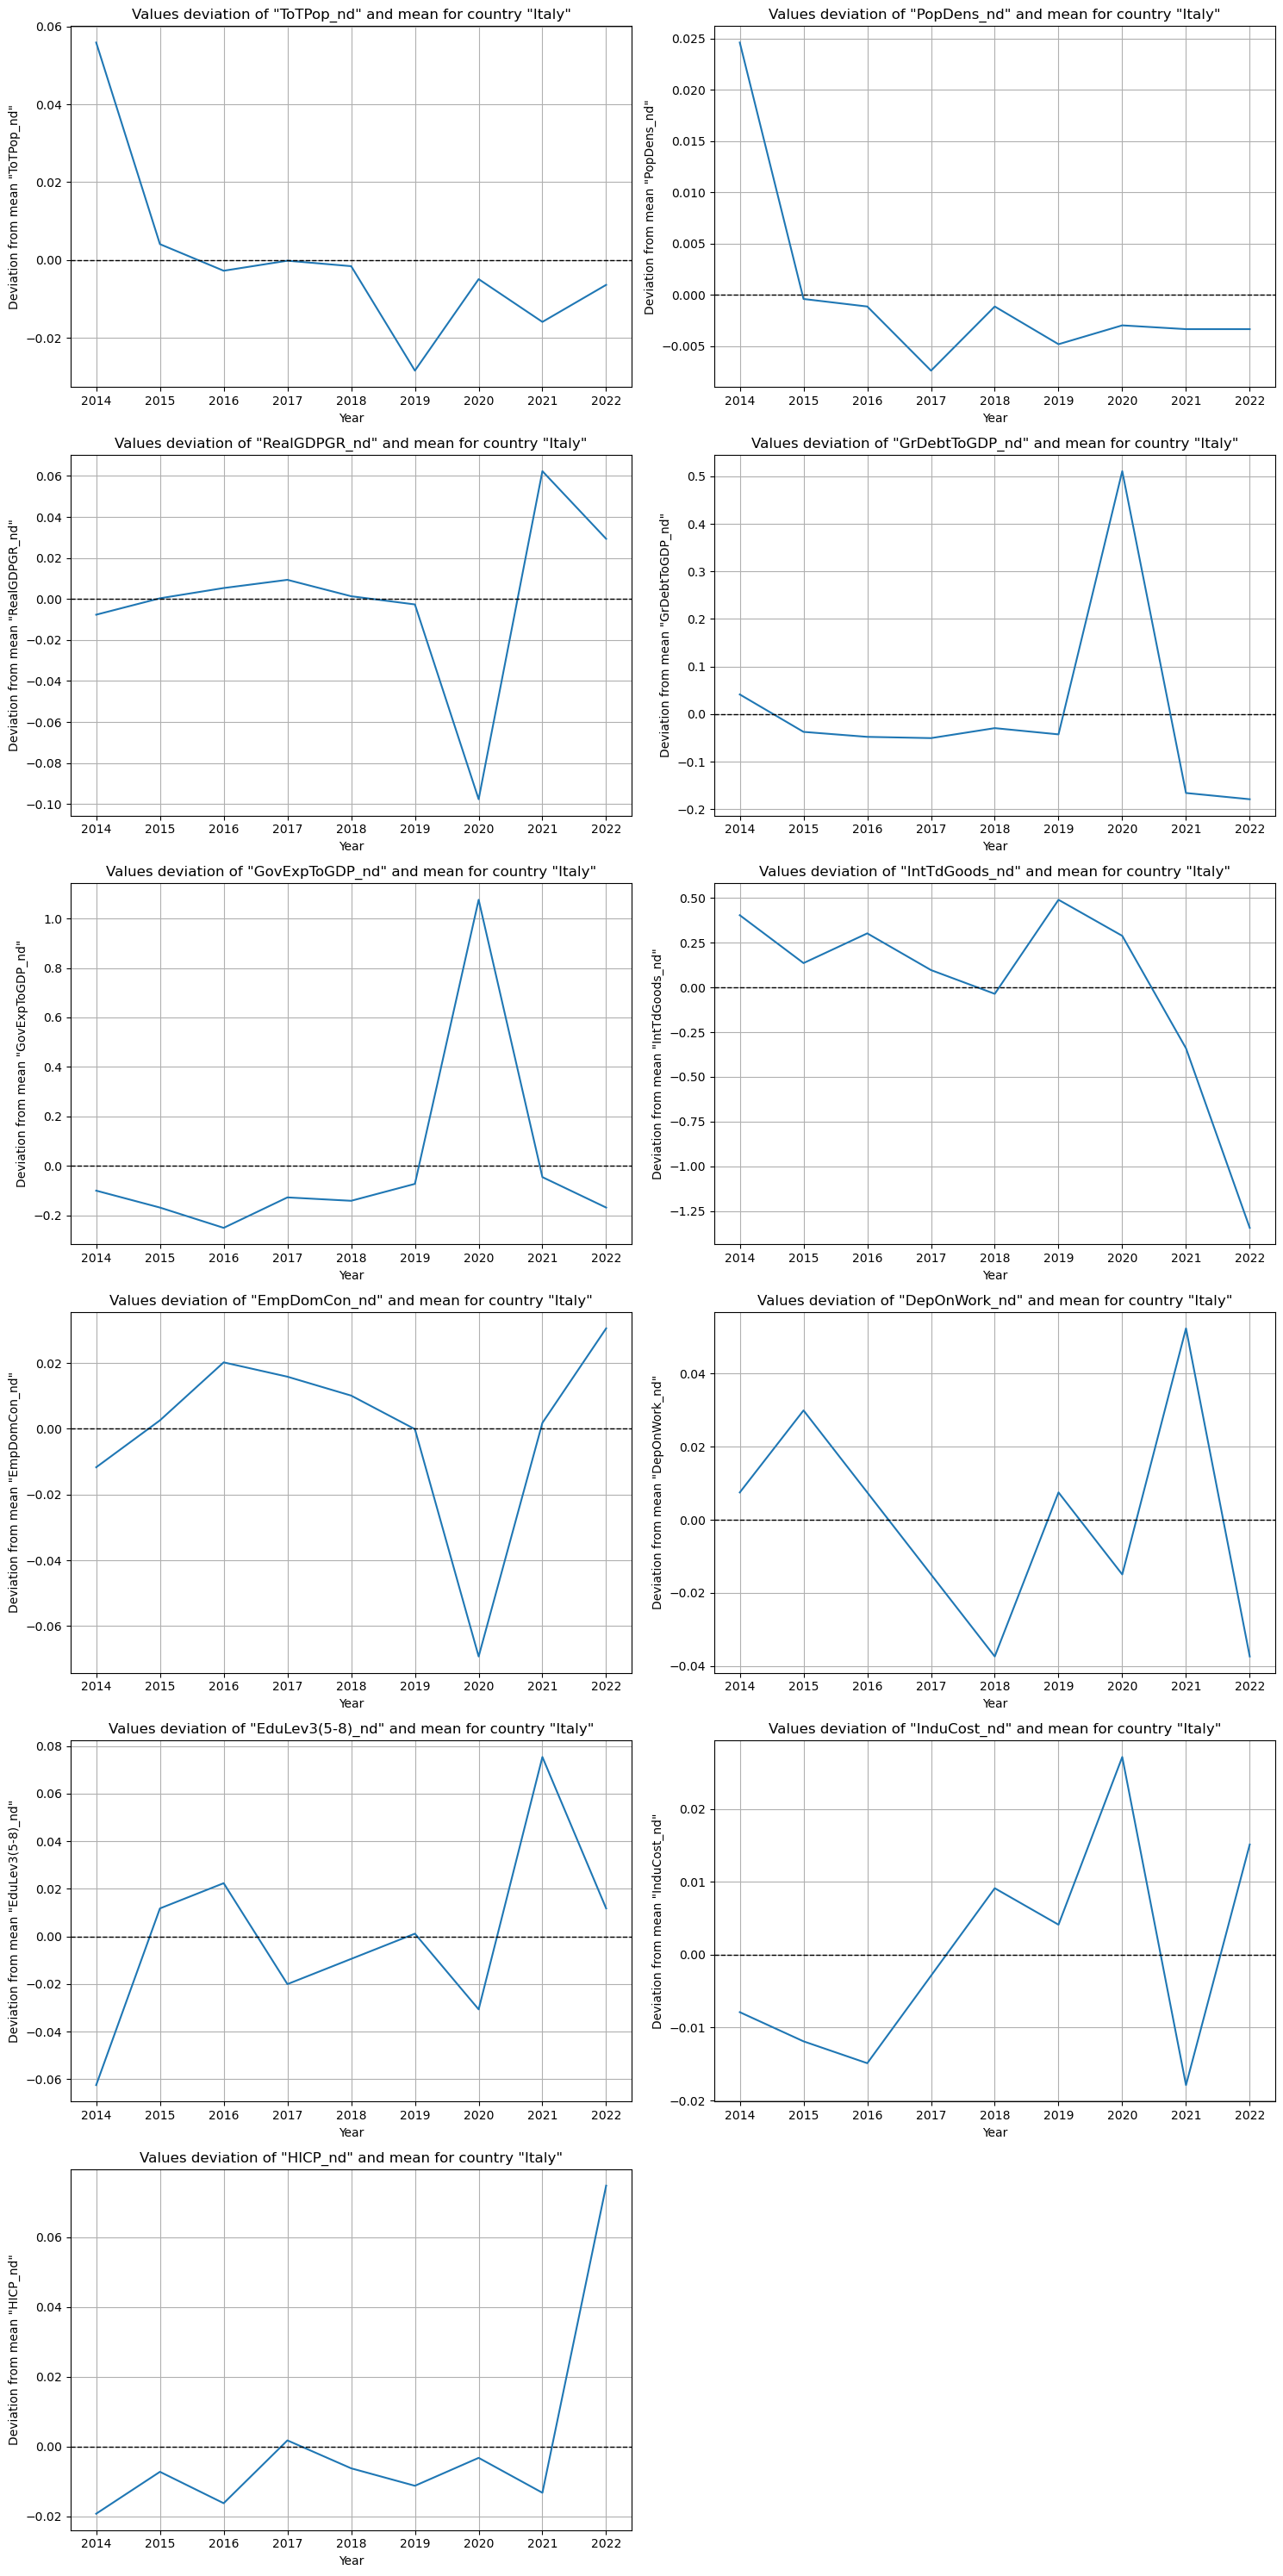

In [16]:
# Check by 'geo'
df_check_geo_distr = data_distribution(df_normalize)

--> **IMPORTANT:** following will be pasted screenshot of output you will get from udf, because GitHub does not print colors mapping.

# 4th plot: intensity color change by difference values over years
### **Dataset**: df_normalize

In [20]:

def color_nan(val):
    """
    Applies a light gray color for NaN values.
    """
    if pd.isna(val):
        return 'background-color: #D3D3D3'  # light gray
    else:
        return ''  # default (no coloring)

def financial_table_sorted(df, 
                           to_col_number='Market Cap', 
                           main_cat_col='Country',
                           sub_cat_target_col=None,
                           sort_by='P/E Ratio',
                           ascending_order=False,
                           highlight_gradient=True,
                           main_cat_filter_value=None,
                           sub_cat_filter_value=None,
                           exclude_columns=None,
                           exclude_view_columns=None
                           ):
    
    if exclude_columns is None:
        exclude_columns = []

    if exclude_view_columns is None:
        exclude_view_columns = []
    
    columns_to_plot = df.columns[df.columns.get_loc(to_col_number) + 1:]

    # Remove columns that user wants to exclude from view
    columns_to_plot = [col for col in columns_to_plot if col not in exclude_view_columns]
    
    # Filter dataframe by values required from user
    if main_cat_filter_value:
        df = df[df[main_cat_col] == main_cat_filter_value]
    
    if sub_cat_target_col and sub_cat_filter_value:
        df = df[df[sub_cat_target_col] == sub_cat_filter_value]

    # If sub_cat_target_col is specified
    if sub_cat_target_col:
        # Group by group and subgroups with observed=True to avoid the warning
        df_cat = df.groupby([main_cat_col, sub_cat_target_col], observed=True)[columns_to_plot].mean()
    else:
        # Group by group 
        df_cat = df.groupby(main_cat_col)[columns_to_plot].mean()
    
    print(f'Table sorted by: {sort_by}')
    sort_financial_df = df_cat.sort_values(by=sort_by, ascending=ascending_order)

    styled_df = sort_financial_df.style

    # Apply the gradient only if specified
    if highlight_gradient:
        for col in columns_to_plot:
            if col not in exclude_columns:
                styled_df = styled_df.background_gradient(cmap='BuGn', subset=col)

    return styled_df.map(color_nan)

In [27]:
# # Filter: df, column from witch get numeric columns, category reference, sub category (optional)
financial_table_sorted(df_normalize, to_col_number='year',
                       main_cat_col='country', # main columns
                       sub_cat_target_col='year', # sub column (optional)
                       sort_by='year',
                       ascending_order=True,
                       highlight_gradient=True,
                       main_cat_filter_value='Italy',  # Filter by specific value
                       sub_cat_filter_value=None, # Sub filter by specific value
                       exclude_columns=None, # Exclude some columns
                       exclude_view_columns=None) # Exclude viewing specific col

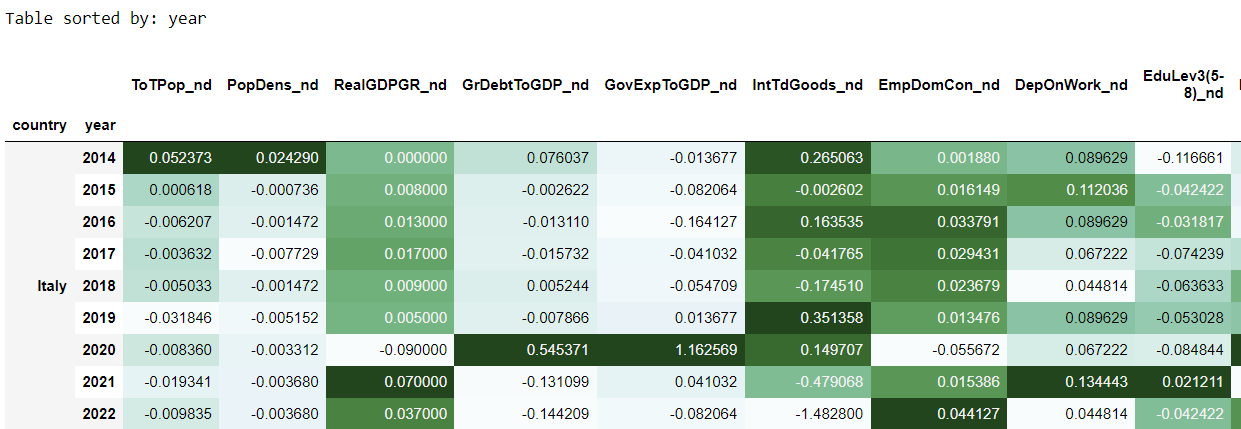

# 5th plot: intensity color by values mean change over years
### **Data**: df_mean_distance

In [23]:
def gradient_based_on_value(df, last_col='Year', exclude_columns=[], exclude_values=[]):
    
    # Find the columns to highlight
    columns_to_highlight = [col for col in df.columns[df.columns.get_loc(last_col)+1:].tolist() if col not in exclude_columns]
    
    def highlight_based_on_mean(value, mean, std_dev, min_value, max_value):
        """Colors the value based on its distance from the mean."""
        if pd.isna(value):  # If the value is NaN
            return 'background-color: AliceBlue;'
        
        elif value in exclude_values:  # If the value is in the list of values ​​to exclude
            return 'background-color: white;'
        
        elif value <= 0:  # If the value is negative or zero
            if min_value == 0:
                return f'background-color: rgb(255, 255, 255);'  # White for zero if min_value is zero
            intensity = int((value - min_value) / (0 - min_value) * 255)
            return f'background-color: rgb(255, {intensity}, {intensity});'
        
        else:  # If the value is positive
            if max_value == 0:
                return f'background-color: rgb(255, 255, 255);'  # Bianco per zero se max_value è zero
            intensity = int(255 - (value / max_value) * 255)
            return f'background-color: rgb({intensity}, 255, {intensity});'

    def style_columns(col):
        """Apply the style only to the columns of interest."""
        mean = col.mean()
        std_dev = col.std()
        min_value = col.min()
        max_value = col.max()
        return col.apply(lambda value: highlight_based_on_mean(value, mean, std_dev, min_value, max_value))

    # Apply the style only to the columns of interest
    styled_df = df.style.apply(style_columns, subset=columns_to_highlight)
    
    return styled_df

In [28]:
styled_df = gradient_based_on_value(df_mean_distance, 'year', exclude_columns=[], exclude_values=[])
styled_df

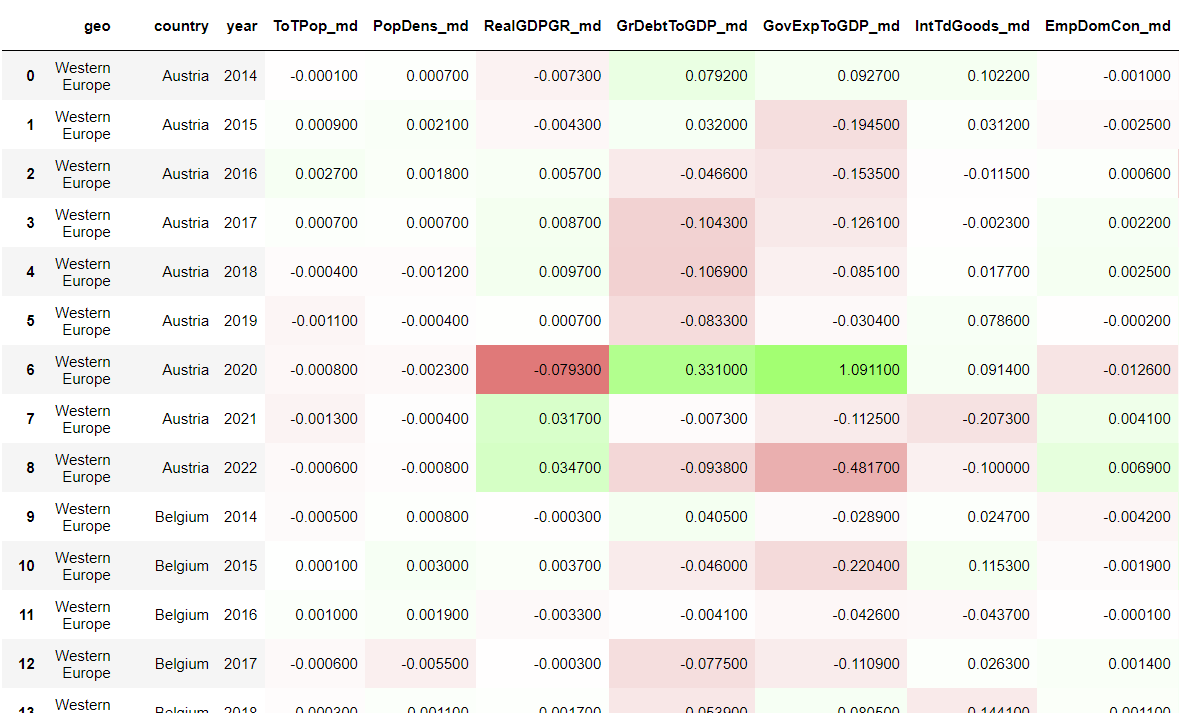